In [1]:
import pandas as pd

In [4]:
#df = pd.read_csv('parsed_data/case_edu_bearing_data/normal_data/bearing_at_1730_rpm_case_edu.csv')
df = pd.read_csv('parsed_data/case_edu_bearing_data/12k_drive_end_bearing_fault_data/028_3HP_1730RPM_IR.csv')

In [5]:
df.describe()

X059_DE_time  fault_diameter  horse_power  rounds_per_minute   
count  121535.000000        121535.0     121535.0           121535.0  \
mean        0.008088            28.0          3.0             1730.0   
std         0.823076             0.0          0.0                0.0   
min        -3.820384            28.0          3.0             1730.0   
25%        -0.536701            28.0          3.0             1730.0   
50%        -0.011393            28.0          3.0             1730.0   
75%         0.531004            28.0          3.0             1730.0   
max         4.346913            28.0          3.0             1730.0   

       samples_per_second  
count            121535.0  
mean              12000.0  
std                   0.0  
min               12000.0  
25%               12000.0  
50%               12000.0  
75%               12000.0  
max               12000.0

In [7]:
import plotly.graph_objects as go

In [9]:
# Create histogram
fig = go.Figure(data=[go.Histogram(x=df['X059_DE_time'], nbinsx=75)])

# Update layout
fig.update_layout(
    title='Хистограма на стойностите на вентилаторния край',
    xaxis_title='Стойности',
    yaxis_title='Честота'
)

# Show the plot
fig.show()

In [10]:
import numpy as np

In [11]:
num_entries = 121535
sample_rate = 12000  # 12kHz

start_time = pd.Timestamp('2024-01-01')
time_delta = pd.to_timedelta(np.arange(num_entries) / sample_rate, unit='s')
time_index = start_time + time_delta
time_index

DatetimeIndex([          '2024-01-01 00:00:00',
               '2024-01-01 00:00:00.000083333',
               '2024-01-01 00:00:00.000166667',
                  '2024-01-01 00:00:00.000250',
               '2024-01-01 00:00:00.000333333',
               '2024-01-01 00:00:00.000416667',
                  '2024-01-01 00:00:00.000500',
               '2024-01-01 00:00:00.000583333',
               '2024-01-01 00:00:00.000666667',
                  '2024-01-01 00:00:00.000750',
               ...
               '2024-01-01 00:00:10.127083333',
               '2024-01-01 00:00:10.127166667',
                  '2024-01-01 00:00:10.127250',
               '2024-01-01 00:00:10.127333333',
               '2024-01-01 00:00:10.127416667',
                  '2024-01-01 00:00:10.127500',
               '2024-01-01 00:00:10.127583333',
               '2024-01-01 00:00:10.127666667',
                  '2024-01-01 00:00:10.127750',
               '2024-01-01 00:00:10.127833333'],
              dtype=

In [12]:
df_indexed = df.set_index(time_index)

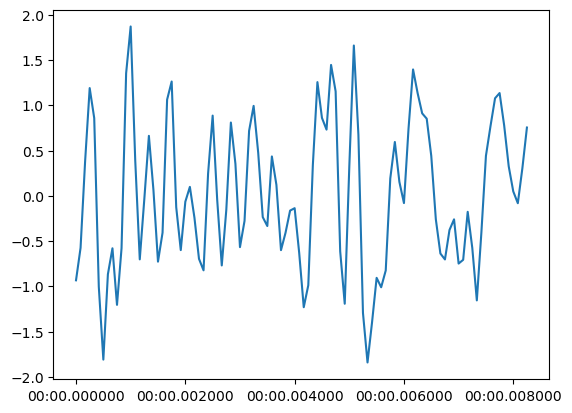

In [14]:
import matplotlib.pyplot as plt

plt.plot(df_indexed['X059_DE_time'][:100])

In [15]:
from statsmodels.tsa.seasonal import STL

In [17]:
df_downsampled = df_indexed[['X059_DE_time']].resample('1ms').mean()

In [18]:
df_downsampled

X059_DE_time
2024-01-01 00:00:00.000     -0.313856
2024-01-01 00:00:00.001      0.227050
2024-01-01 00:00:00.002     -0.032823
2024-01-01 00:00:00.003      0.013699
2024-01-01 00:00:00.004      0.083652
...                               ...
2024-01-01 00:00:10.123      0.315449
2024-01-01 00:00:10.124     -0.304870
2024-01-01 00:00:10.125      0.184970
2024-01-01 00:00:10.126     -0.104845
2024-01-01 00:00:10.127     -0.166755

[10128 rows x 1 columns]

In [19]:
seasonal_period = sample_rate * 24 * 60 * 60
seasonal_period_downsampled = 24 * 60 * 60

In [32]:
stl = STL(df_downsampled['X059_DE_time'][:500], period = 12)
result = stl.fit()

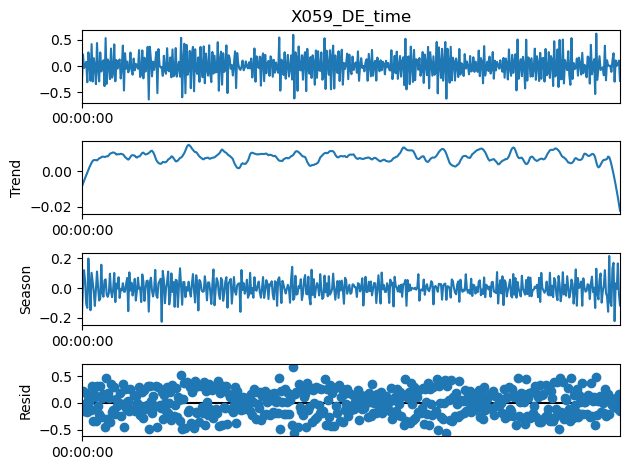

In [33]:
result.plot()
plt.show()

In [52]:
stl = STL(df_downsampled['X100_FE_time'][:500], period = 12)
result = stl.fit()

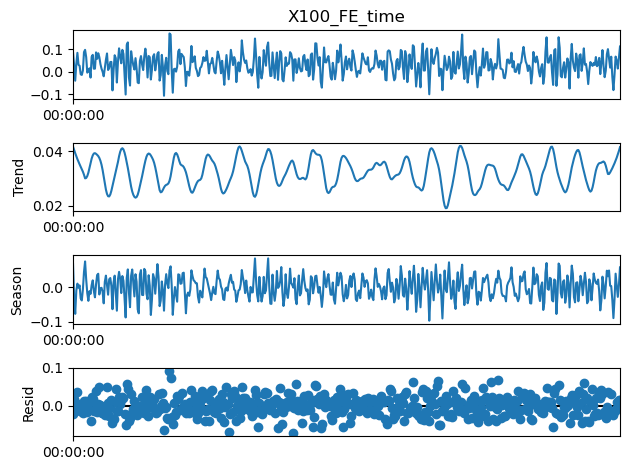

In [53]:
result.plot()
plt.show()

In [34]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
import plotly.express as px

In [36]:
de_data = df_downsampled['X059_DE_time'][:500]
#fe_data = df_downsampled['X100_FE_time'][:500]
rolling_mean_de = df_downsampled['X059_DE_time'][:500].rolling(window=15).mean()
#rolling_mean_fe = df_downsampled['X100_FE_time'][:500].rolling(window=15).mean()

In [58]:
df_downsampled['X100_FE_time']

2024-01-01 00:00:00.000    0.085589
2024-01-01 00:00:00.001    0.027959
2024-01-01 00:00:00.002   -0.039482
2024-01-01 00:00:00.003    0.034722
2024-01-01 00:00:00.004    0.083260
                             ...   
2024-01-01 00:00:40.466    0.012909
2024-01-01 00:00:40.467   -0.033369
2024-01-01 00:00:40.468    0.051757
2024-01-01 00:00:40.469    0.090537
2024-01-01 00:00:40.470    0.052322
Freq: L, Name: X100_FE_time, Length: 40471, dtype: float64

In [60]:
rolling_mean_de.values

array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan, 0.01052465,
       0.00927382, 0.01117222, 0.01209448, 0.01346352, 0.01508115,
       0.01890403, 0.01994972, 0.01598255, 0.01627287, 0.01623549,
       0.01488297, 0.0136956 , 0.01056289, 0.00998833, 0.01419715,
       0.01589649, 0.01373037, 0.0131758 , 0.00983708, 0.00942072,
       0.00938422, 0.00596727, 0.00333611, 0.00288672, 0.00397152,
       0.00674436, 0.01375905, 0.01868064, 0.01824515, 0.01742808,
       0.01788877, 0.0173907 , 0.01687003, 0.01313408, 0.00652445,
       0.00577082, 0.01303933, 0.01543928, 0.01435795, 0.01466827,
       0.01547405, 0.01140257, 0.00947114, 0.01145646, 0.01182675,
       0.00963021, 0.00549875, 0.00499808, 0.00931033, 0.01145994,
       0.01154165, 0.01377122, 0.01398592, 0.01521675, 0.01411

In [37]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_downsampled.index[:500], y=de_data, mode='lines', name='Сигнал'))
fig.add_trace(go.Scatter(x=df_downsampled.index[:500], y=rolling_mean_de, mode='lines', name='Пълзяща средна на сигнала, 15 такта прозорец', line=dict(color='orange')))
fig.update_layout(title='Сигнал и пълзяща средна', xaxis_title='Време', yaxis_title='Стойност')
fig.show()

In [83]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_downsampled.index[:500], y=fe_data, mode='lines', name='Сигнал'))
fig.add_trace(go.Scatter(x=df_downsampled.index[:500], y=rolling_mean_fe, mode='lines', name=f'Пълзяща средна, 15 такта прозорец', line=dict(color='orange')))
fig.update_layout(title='Сигнал и пълзяща средна', xaxis_title='Време', yaxis_title='Стойност')
fig.show()

In [38]:
lags = 50
acf_vals = acf(de_data, nlags=lags)
pacf_vals = pacf(de_data, nlags=lags)
pacf_vals = np.clip(pacf_vals, -1, 1)

In [39]:
acf_fig = px.bar(x=np.arange(len(acf_vals)), y=acf_vals, labels={'x': 'Отместване', 'y': 'Автокорелация'}, title='Автокорелационна функция')
acf_fig.show()

In [40]:
pacf_fig = px.bar(x=np.arange(len(pacf_vals)), y=pacf_vals, labels={'x': 'Отместване', 'y': 'Автокорелация'}, title='Частична автокорелационна функция')
pacf_fig.show()

In [96]:
lags = 50
acf_vals = acf(fe_data, nlags=lags)
pacf_vals = pacf(fe_data, nlags=lags)
pacf_vals = np.clip(pacf_vals, -1, 1)

In [97]:
acf_fig = px.bar(x=np.arange(len(acf_vals)), y=acf_vals, labels={'x': 'Отместване', 'y': 'Автокорелация'}, title='Автокорелационна функция')
acf_fig.show()

In [98]:
pacf_fig = px.bar(x=np.arange(len(pacf_vals)), y=pacf_vals, labels={'x': 'Отместване', 'y': 'Автокорелация'}, title='Частична автокорелационна функция')
pacf_fig.show()

In [41]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [42]:
de_data

2024-01-01 00:00:00.000   -0.313856
2024-01-01 00:00:00.001    0.227050
2024-01-01 00:00:00.002   -0.032823
2024-01-01 00:00:00.003    0.013699
2024-01-01 00:00:00.004    0.083652
                             ...   
2024-01-01 00:00:00.495    0.110948
2024-01-01 00:00:00.496    0.007901
2024-01-01 00:00:00.497    0.036384
2024-01-01 00:00:00.498    0.108100
2024-01-01 00:00:00.499   -0.280015
Freq: L, Name: X059_DE_time, Length: 500, dtype: float64

In [44]:
result = adfuller(de_data)

In [45]:
adf_statistic = result[0]
p_value = result[1]
used_lag = result[2]
n_obs = result[3]
critical_values = result[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print(f'Number of lags used: {used_lag}')
print(f'Number of observations used: {n_obs}')
print(f'Critical Values: {critical_values}')

ADF Statistic: -7.9958294797779255
p-value: 2.4057973446565027e-12
Number of lags used: 18
Number of observations used: 481
Critical Values: {'1%': -3.4440184853599876, '5%': -2.867567599912013, '10%': -2.5699804779975883}


In [46]:
result = kpss(de_data, regression='c')
kpss_statistic = result[0]
p_value = result[1]
n_lags = result[2]
critical_values = result[3]

print(f'KPSS Statistic: {kpss_statistic}')
print(f'p-value: {p_value}')
print(f'Number of lags used: {n_lags}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

KPSS Statistic: 0.014196923939210529
p-value: 0.1
Number of lags used: 16
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739


d:\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




In [119]:
de_data_diff = de_data.diff(1)
fe_data_diff = fe_data.diff(1)
de_data_log = np.log(de_data)
fe_data_log = np.log(fe_data)

In [121]:
result = adfuller(de_data_diff.dropna())
adf_statistic = result[0]
p_value = result[1]
used_lag = result[2]
n_obs = result[3]
critical_values = result[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print(f'Number of lags used: {used_lag}')
print(f'Number of observations used: {n_obs}')
print(f'Critical Values: {critical_values}')

ADF Statistic: -8.455036054676041
p-value: 1.6234805462851547e-13
Number of lags used: 18
Number of observations used: 480
Critical Values: {'1%': -3.4440471158221206, '5%': -2.867580197120949, '10%': -2.5699871918402777}


In [123]:
result = adfuller(de_data_log.dropna())
adf_statistic = result[0]
p_value = result[1]
used_lag = result[2]
n_obs = result[3]
critical_values = result[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print(f'Number of lags used: {used_lag}')
print(f'Number of observations used: {n_obs}')
print(f'Critical Values: {critical_values}')

ADF Statistic: -11.591668982461306
p-value: 2.782333998074831e-21
Number of lags used: 2
Number of observations used: 301
Critical Values: {'1%': -3.452263435801039, '5%': -2.871190526189069, '10%': -2.571911967527952}


In [125]:
result = adfuller(fe_data_diff.dropna())
adf_statistic = result[0]
p_value = result[1]
used_lag = result[2]
n_obs = result[3]
critical_values = result[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print(f'Number of lags used: {used_lag}')
print(f'Number of observations used: {n_obs}')
print(f'Critical Values: {critical_values}')

ADF Statistic: -7.84970275075648
p-value: 5.644156380046269e-12
Number of lags used: 18
Number of observations used: 480
Critical Values: {'1%': -3.4440471158221206, '5%': -2.867580197120949, '10%': -2.5699871918402777}


In [126]:
result = adfuller(fe_data_log.dropna())
adf_statistic = result[0]
p_value = result[1]
used_lag = result[2]
n_obs = result[3]
critical_values = result[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print(f'Number of lags used: {used_lag}')
print(f'Number of observations used: {n_obs}')
print(f'Critical Values: {critical_values}')

ADF Statistic: -6.472657936262939
p-value: 1.3550439623569522e-08
Number of lags used: 12
Number of observations used: 373
Critical Values: {'1%': -3.448003816652923, '5%': -2.86931999731073, '10%': -2.5709145866785503}


In [127]:
de_data

2024-01-01 00:00:00.000    0.088575
2024-01-01 00:00:00.001    0.039185
2024-01-01 00:00:00.002    0.052154
2024-01-01 00:00:00.003   -0.001304
2024-01-01 00:00:00.004   -0.054570
                             ...   
2024-01-01 00:00:00.495   -0.042001
2024-01-01 00:00:00.496    0.009562
2024-01-01 00:00:00.497   -0.041236
2024-01-01 00:00:00.498    0.051528
2024-01-01 00:00:00.499    0.098345
Freq: L, Name: X100_DE_time, Length: 500, dtype: float64

In [128]:
fe_data

2024-01-01 00:00:00.000    0.085589
2024-01-01 00:00:00.001    0.027959
2024-01-01 00:00:00.002   -0.039482
2024-01-01 00:00:00.003    0.034722
2024-01-01 00:00:00.004    0.083260
                             ...   
2024-01-01 00:00:00.495    0.066841
2024-01-01 00:00:00.496    0.049994
2024-01-01 00:00:00.497    0.013971
2024-01-01 00:00:00.498    0.060095
2024-01-01 00:00:00.499    0.111271
Freq: L, Name: X100_FE_time, Length: 500, dtype: float64

In [47]:
de_data_fft = np.fft.fft(de_data)
#fe_data_fft = np.fft.fft(fe_data)
de_frequencies = np.fft.fftfreq(len(de_data), d=1/12000)
#fe_frequencies = np.fft.fftfreq(len(fe_data), d=1/12000)
de_magnitude = np.abs(de_data_fft)
#fe_magnitude = np.abs(fe_data_fft)

In [48]:

from plotly.subplots import make_subplots

In [49]:
fig = make_subplots(rows=2, cols=1, subplot_titles=('Сигнал - Валов Край', 'Трансформация на Фурие - честотен спектър'))

# Add the original time series plot
fig.add_trace(go.Scatter(x=df.index, y=de_data, mode='lines', name='Сигнал'), row=1, col=1)

# Add the FFT magnitude plot
fig.add_trace(go.Scatter(x=de_frequencies[:len(de_frequencies)//2], y=de_magnitude[:len(de_magnitude)//2], mode='lines', name='Амплитуда на Трансформацията на Фурие'), row=2, col=1)

# Update layout
fig.update_xaxes(title_text='Време', row=1, col=1)
fig.update_yaxes(title_text='Стойност', row=1, col=1)

fig.update_xaxes(title_text='Честота (Hz)', row=2, col=1)
fig.update_yaxes(title_text='Амплитуда', row=2, col=1)
fig.update_layout(height=800, width=1500, title_text='Сигнал и Трансформация на Фурие')

fig.show()

In [50]:
fig = make_subplots(rows=2, cols=1, subplot_titles=('Сигнал - Валов Край', 'Трансформация на Фурие - честотен спектър'))

# Add the original time series plot
fig.add_trace(go.Scatter(x=df.index, y=de_data, mode='lines', name='Сигнал'), row=1, col=1)

# Add the FFT magnitude plot
fig.add_trace(go.Scatter(x=de_frequencies[:len(de_frequencies)//2], y=de_magnitude[:len(de_magnitude)//2], mode='lines', name='Амплитуда на Трансформацията на Фурие'), row=2, col=1)

# Update layout
fig.update_xaxes(title_text='Време', row=1, col=1)
fig.update_yaxes(title_text='Стойност', row=1, col=1)

fig.update_xaxes(title_text='Честота (Hz)', row=2, col=1)
fig.update_yaxes(title_text='Амплитуда', row=2, col=1)
fig.update_layout(height=800, width=1500, title_text='Сигнал и Трансформация на Фурие')

fig.show()